<a href="https://colab.research.google.com/github/DeveshGund1403/CognifyzTechnologies_ML-Internship/blob/main/Predict_Restaurant_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.049382522239665085
R-squared: 0.9783039729424597


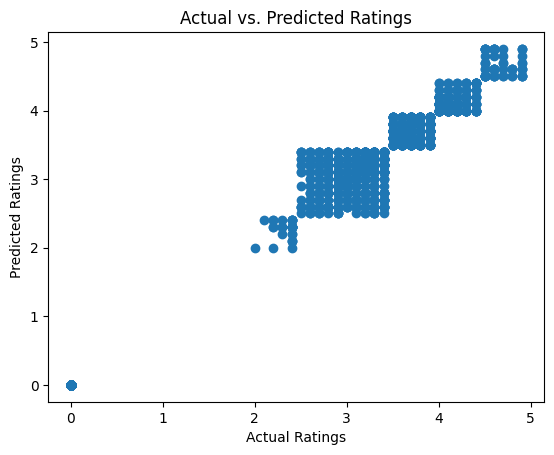

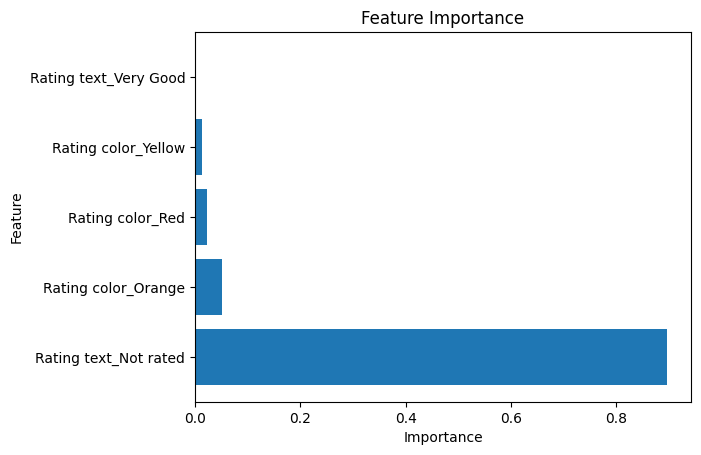

                     Feature  Importance
17176  Rating text_Not rated    0.896654
17169    Rating color_Orange    0.051526
17170       Rating color_Red    0.022198
17172    Rating color_Yellow    0.013084
17178  Rating text_Very Good    0.002580


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Dataset .csv')

if 'Aggregate rating' not in df.columns:
    print("Error: 'Aggregate rating' column not found in the dataset.")
else:
    X = df.drop(columns=['Aggregate rating'])
    y = df['Aggregate rating']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', DecisionTreeRegressor())])

    # Train the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title("Actual vs. Predicted Ratings")
    plt.show()

if isinstance(model.named_steps['regressor'], DecisionTreeRegressor):
    feature_importance = model.named_steps['regressor'].feature_importances_

    categorical_encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    feature_names = numeric_features.tolist() + list(categorical_encoder.get_feature_names_out(categorical_features))

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False).head()

    # Plotting feature importances
    plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show()

    print(importance_df_sorted)